In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

In [2]:
def creat_data_no_linear_2d(n):
    np.random.seed(1)
    x_11=np.random.randint(0,100,(n,1))
    x_12=10+np.random.randint(-5,5,(n,1))
    x_21=np.random.randint(0,100,(n,1))
    x_22=20+np.random.randint(0,10,(n,1))

    x_31=np.random.randint(0,100,(int(n/10),1))
    x_32=20+np.random.randint(0,10,(int(n/10),1))

    new_x_11=x_11*np.sqrt(2)/2-x_12*np.sqrt(2)/2
    new_x_12=x_11*np.sqrt(2)/2+x_12*np.sqrt(2)/2
    new_x_21=x_21*np.sqrt(2)/2-x_22*np.sqrt(2)/2
    new_x_22=x_21*np.sqrt(2)/2+x_22*np.sqrt(2)/2
    new_x_31=x_31*np.sqrt(2)/2-x_32*np.sqrt(2)/2
    new_x_32=x_31*np.sqrt(2)/2+x_32*np.sqrt(2)/2

    plus_samples=np.hstack([new_x_11,new_x_12,np.ones((n,1))])
    minus_samples=np.hstack([new_x_21,new_x_22,-np.ones((n,1))])
    err_samples=np.hstack([new_x_31,new_x_32,np.ones((int(n/10),1))])
    samples=np.vstack([plus_samples,minus_samples,err_samples])
    np.random.shuffle(samples)
    return samples


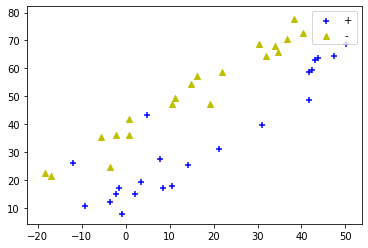

In [3]:
def plot_samples_2d(ax,samples):
    Y=samples[:,-1]
    position_p=Y==1
    position_m=Y==-1
    plt.scatter(samples[position_p,0],samples[position_p,1],
        marker='+',label='+',color='b')
    plt.scatter(samples[position_m,0],samples[position_m,1],
        marker='^',label='-',color='y')

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
data=creat_data_no_linear_2d(20)
plot_samples_2d(ax,data)
ax.legend(loc='best')
plt.show()


0.9523809523809523


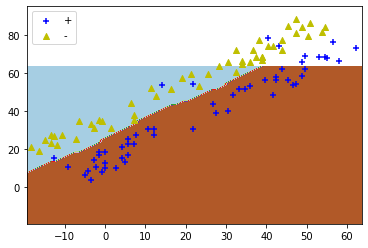

In [4]:
def predict_with_MLPClassifier(ax,train_data):
    train_x=train_data[:,:-1]
    train_y=train_data[:,-1]
    clf=MLPClassifier(activation='logistic',max_iter=1000)
    clf.fit(train_x,train_y)
    print(clf.score(train_x,train_y))

    #预测平面上每一点的输出
    x_min,x_max=train_x[:,0].min()-1,train_x[:,0].max()+2
    y_min,y_max=train_x[:,0].min()-1,train_x[:,0].max()+2
    plot_step=1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,plot_step),
        np.arange(y_min,y_max,plot_step))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    ax.contourf(xx,yy,Z,cmap=plt.cm.Paired)

data=creat_data_no_linear_2d(50)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
predict_with_MLPClassifier(ax,data)
plot_samples_2d(ax,data)
ax.legend(loc='best')
plt.show()
